In [41]:
import os
from src.analyzer import *
%matplotlib inline
output_dir = 'output/sparsity'

In [42]:
pkl_fns = [os.path.join(output_dir, fn) 
           for fn in os.listdir(output_dir) 
           if fn.endswith('.pkl')]
pkl_fns.sort()
pkl_fns

['output/sparsity/data_2016_02_22__17_46_51.pkl',
 'output/sparsity/data_2016_02_22__17_47_40.pkl',
 'output/sparsity/data_2016_02_22__17_48_29.pkl',
 'output/sparsity/data_2016_02_22__17_49_18.pkl',
 'output/sparsity/data_2016_02_22__17_50_07.pkl',
 'output/sparsity/data_2016_02_22__17_50_55.pkl',
 'output/sparsity/data_2016_02_22__17_51_44.pkl',
 'output/sparsity/data_2016_02_22__17_52_33.pkl',
 'output/sparsity/data_2016_02_22__17_53_22.pkl',
 'output/sparsity/data_2016_02_22__17_54_11.pkl',
 'output/sparsity/data_2016_02_22__17_54_59.pkl',
 'output/sparsity/data_2016_02_22__17_55_48.pkl',
 'output/sparsity/data_2016_02_22__17_56_37.pkl',
 'output/sparsity/data_2016_02_22__17_57_26.pkl',
 'output/sparsity/data_2016_02_22__17_58_15.pkl',
 'output/sparsity/data_2016_02_22__17_59_03.pkl',
 'output/sparsity/data_2016_02_22__17_59_52.pkl',
 'output/sparsity/data_2016_02_22__18_00_41.pkl',
 'output/sparsity/data_2016_02_22__18_01_30.pkl',
 'output/sparsity/data_2016_02_22__18_02_19.pkl',


In [43]:
snr_list_ = [DataAnalyzer.fromfilename(pkl_fn).SNR_list() for pkl_fn in pkl_fns]

In [44]:
in_idx = slice(0, 20)
sp_idx = slice(20, 40)

In [45]:
da = DataAnalyzer.fromfilename(pkl_fns[-1])

In [46]:
snr_sp = np.array(snr_list_[sp_idx])
snr_id = np.array(snr_list_[in_idx])
t = da.time_list()

In [47]:
def plot_fill_between(t, data, label='', c = 'r'):
    """
    t : array, shape (timesteps, )
        indices for time
    data : array, shape (samples, timesteps)
        SNR to plot mean and +/- one sdev
    """
    mm = data.mean(0)
    sd = data.std(0)
    plt.fill_between(t, mm-sd, mm + sd, alpha=0.5, color=c)
    plt.plot(t, mm, color=c, label=label)

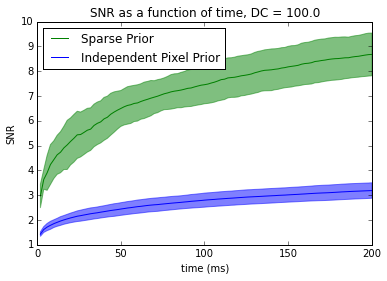

In [48]:
plot_fill_between(t, snr_sp, c = 'g', label='Sparse Prior')
plot_fill_between(t, snr_id, c = 'b', label='Independent Pixel Prior')
plt.xlabel('time (ms)')
plt.ylabel('SNR')
plt.title('SNR as a function of time, DC = {}'.format(100.))
plt.legend(loc='upper left')
plt.savefig(os.path.join(output_dir, 'sp_vs_indep.png'), dpi=200)

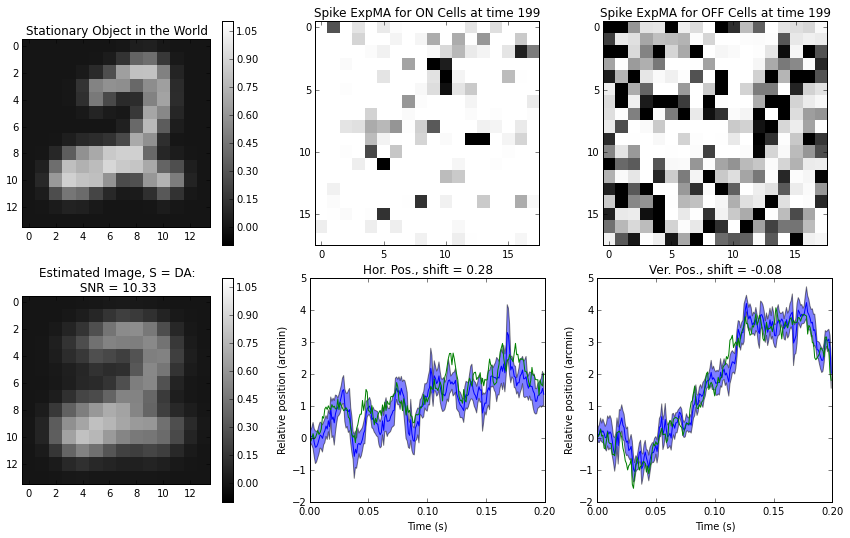

In [51]:
da_[-2].plot_EM_estimate(-1)
plt.savefig(os.path.join(output_dir, 'sparse_example.png'))